## Data Exploriation on product_data

### to attract side data for the recommender 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [6]:
post = pd.read_csv('PostsForAnalysis.txt')

/home/joanna/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,14,15,16,17,18,19,22,25,31,33,35,36,37,38,39,40,42,43,44,45,46,48,50,51,53,55,56,57,60,63,64,66,67,68,69,70,79,81,83,84,85,86,87,88,90,95,100,103,104,106,107,110,113,114,115,118,119,121,122,126,127,131,132,134,135,138,139,140,141,142,148,149,151,152,154,157,159,163,164,167,169,171,173,174,175,178,179,182,185,187,190,193,200,201,204,209,211,215,216,217,218,219,220,221,227,229,230,232,234,236,237,238,239,243,244,247,248,252,253,254,256,258,259,261,262,264,265,266,268,269,271,272,274,275,277,280,281,282,283,284,287,292,293,298,307,310,311,312) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
post.head()

,id,date,day,created_at,time_of_day,name,tagline,thumbnail_type,product_state,comments_count,...,wi.fi,windows,wine,wordpress,writing.tools,xbox.one,yoga.books,youtube,user_id,votes_count
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61044,1500
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,802
2,82502,2016-11-16,Wednesday,2016-11-16 10:16:06,Morning,Google Earth VR,Walk the earth in VR,image,default,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344208,544
3,82370,2016-11-16,Wednesday,2016-11-16 00:01:00,Night,Drop,Beautiful color picker with Touch Bar support,image,default,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28756,446
4,82460,2016-11-16,Wednesday,2016-11-16 01:13:32,Night,Lookback Live,Real-time user research on mobile and desktop ...,image,default,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591,416


In [8]:
post.columns

Index([u'id', u'date', u'day', u'created_at', u'time_of_day', u'name',
       u'tagline', u'thumbnail_type', u'product_state', u'comments_count',
       ...
       u'wi.fi', u'windows', u'wine', u'wordpress', u'writing.tools',
       u'xbox.one', u'yoga.books', u'youtube', u'user_id', u'votes_count'],
      dtype='object', length=315)

In [252]:
columns = ['id', 'date', 'day', 'created_at', 'time_of_day', 'name','tagline', 'thumbnail_type', 'product_state', 'comments_count',
 'user_id', 'votes_count', 'num_makers', 'num_topics',
 'productivity',
 'lifehacks',
 'marketing',
 'analytics',
 'wearables',
 'mac',
 'bots',
 'slack',
 'apis',
 'iphone',
 'web']

In [260]:
X = post[columns]

In [262]:
X= X.fillna(False)
X = X.drop_duplicates()

### dummify columns 

In [263]:
for elem in X['time_of_day'].unique():
    X[str(elem)] = X['time_of_day'] == elem

In [264]:
for elem in X['day'].unique():
    X[str(elem)] = X['day'] == elem

In [265]:
for elem in X['thumbnail_type'].unique():
    X[str(elem)] = X['thumbnail_type'] == elem

In [266]:
X.head()

,id,date,day,created_at,time_of_day,name,tagline,thumbnail_type,product_state,comments_count,...,Tuesday,Monday,Sunday,Saturday,Friday,Thursday,image,audio,video,book_preview
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,False,False,False,False,False,False,True,False,False,False
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,False,False,False,False,False,False,True,False,False,False
2,82502,2016-11-16,Wednesday,2016-11-16 10:16:06,Morning,Google Earth VR,Walk the earth in VR,image,default,27,...,False,False,False,False,False,False,True,False,False,False
3,82370,2016-11-16,Wednesday,2016-11-16 00:01:00,Night,Drop,Beautiful color picker with Touch Bar support,image,default,38,...,False,False,False,False,False,False,True,False,False,False
4,82460,2016-11-16,Wednesday,2016-11-16 01:13:32,Night,Lookback Live,Real-time user research on mobile and desktop ...,image,default,25,...,False,False,False,False,False,False,True,False,False,False


In [267]:
X_new = X.drop(['date', 'day', 'created_at', 'time_of_day', 'name', 'tagline', 'thumbnail_type', 'product_state'], axis=1)

In [268]:
X_new.columns

Index([u'id', u'comments_count', u'user_id', u'votes_count', u'num_makers',
       u'num_topics', u'productivity', u'lifehacks', u'marketing',
       u'analytics', u'wearables', u'mac', u'bots', u'slack', u'apis',
       u'iphone', u'web', u'Night', u'Morning', u'Afternoon', u'Evening',
       u'Wednesday', u'Tuesday', u'Monday', u'Sunday', u'Saturday', u'Friday',
       u'Thursday', u'image', u'audio', u'video', u'book_preview'],
      dtype='object')

In [269]:
X_new = X_new[[u'id', u'comments_count', u'user_id', u'votes_count', u'num_makers',
       u'num_topics', u'Night', u'Morning', u'Afternoon', u'Evening',
       u'Wednesday', u'Tuesday', u'Monday', u'Sunday', u'Saturday', u'Friday',
       u'Thursday', u'image', u'audio', u'video', u'book_preview']].astype(int)

In [270]:
X_new.head()


,id,comments_count,user_id,votes_count,num_makers,num_topics,Night,Morning,Afternoon,Evening,...,Tuesday,Monday,Sunday,Saturday,Friday,Thursday,image,audio,video,book_preview
0,82423,24,61044,1500,0,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82480,43,1,802,4,4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,82502,27,344208,544,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,82370,38,28756,446,2,6,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,82460,25,591,416,11,6,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### plotting 

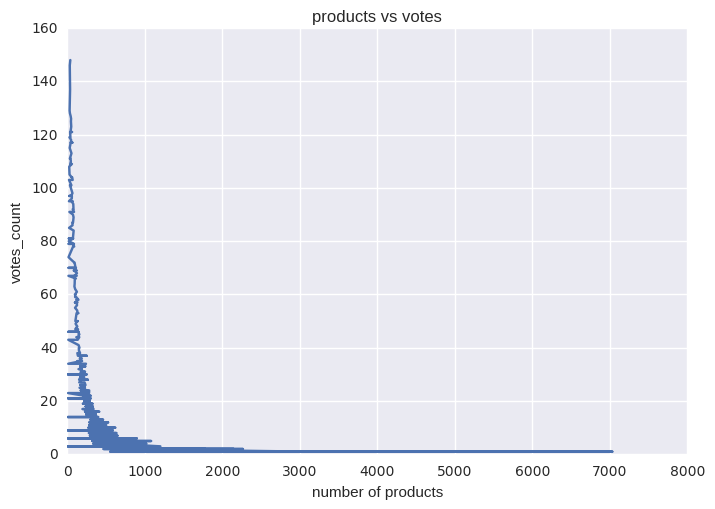

In [271]:
plt.plot(X.votes_count.value_counts())
plt.xlabel('number of products')
plt.ylabel('votes_count')
plt.title('products vs votes')

In [272]:
pca = PCA(n_components=10).fit_transform(X_new)

In [273]:
kmeans = KMeans(n_clusters=5).fit(X_new)

In [274]:
X_new['kmeans_label'] = kmeans.labels_

In [275]:
color_map = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue', 4: 'purple'}

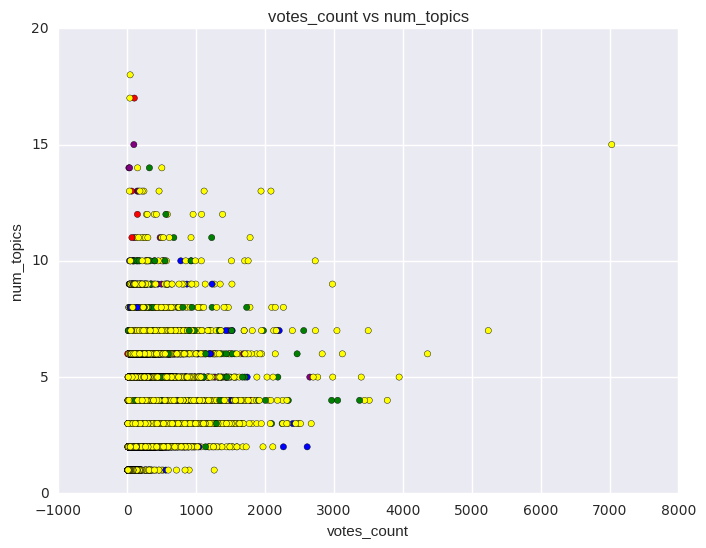

In [276]:
plt.figure(figsize=(8,6))
plt.scatter(X_new['votes_count'],X_new['num_topics'], c=X_new['kmeans_label'].map(color_map))
plt.xlabel('votes_count')
plt.ylabel('num_topics')
plt.title('votes_count vs num_topics')

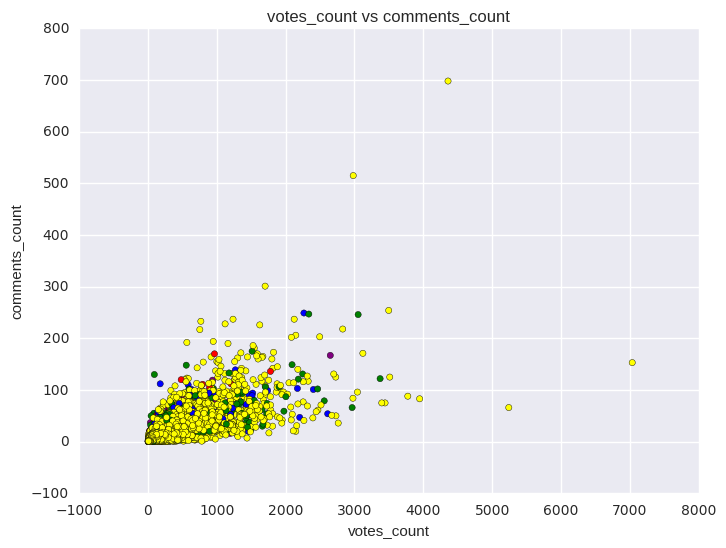

In [277]:
plt.figure(figsize=(8,6))
plt.scatter(X_new['votes_count'],X_new['comments_count'], c=X_new['kmeans_label'].map(color_map))
plt.xlabel('votes_count')
plt.ylabel('comments_count')
plt.title('votes_count vs comments_count')
# user_id small tend to vote more 

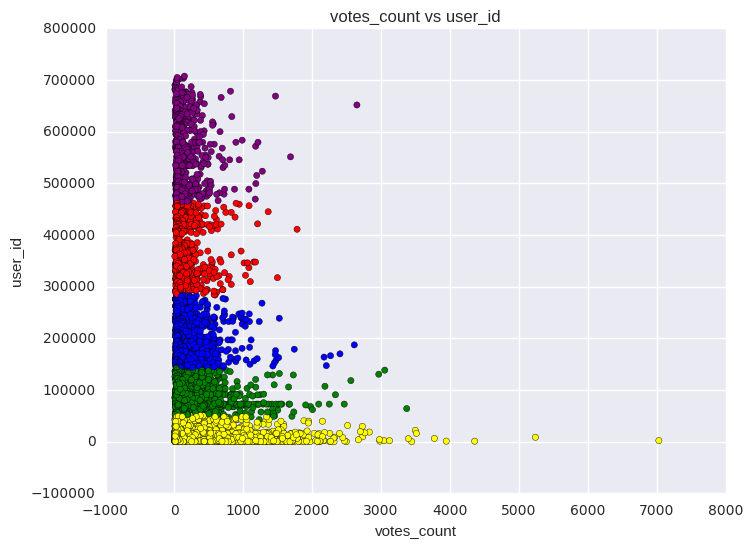

In [278]:
plt.figure(figsize=(8,6))
plt.scatter(X_new['votes_count'],X_new['user_id'], c=X_new['kmeans_label'].map(color_map))
plt.xlabel('votes_count')
plt.ylabel('user_id')
plt.title('votes_count vs user_id')
# user_id small tend to vote more 


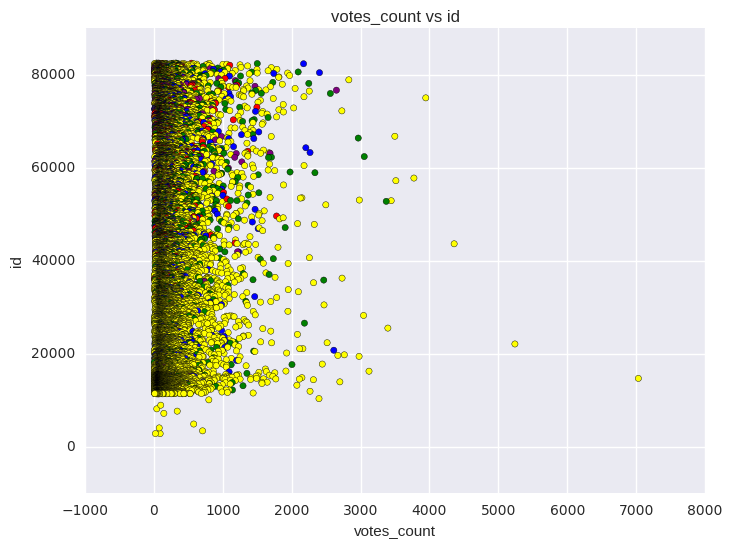

In [279]:
plt.figure(figsize=(8,6))
plt.scatter(X_new['votes_count'],X_new['id'], c=X_new['kmeans_label'].map(color_map))
plt.xlabel('votes_count')
plt.ylabel('id')
plt.title('votes_count vs id')
# vote count has nothing to do with post recency  

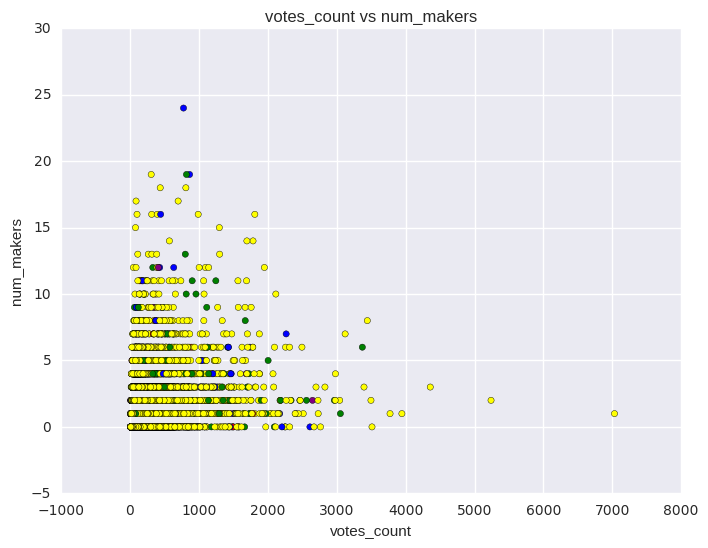

In [280]:
plt.figure(figsize=(8,6))
plt.scatter(X_new['votes_count'],X_new['num_makers'], c=X_new['kmeans_label'].map(color_map))
plt.xlabel('votes_count')
plt.ylabel('num_makers')
plt.title('votes_count vs num_makers')

In [282]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18129 entries, 0 to 18128
Columns: 315 entries, id to votes_count
dtypes: bool(1), int64(6), object(308)
memory usage: 43.4+ MB


In [283]:
post[post.product_state == 'no_longer_online'].count()

id                      338
date                    338
day                     338
created_at              338
time_of_day             338
name                    338
tagline                 338
thumbnail_type          338
product_state           338
comments_count          338
num_makers              338
num_topics              338
X3d.printing              0
X3ds                      0
a.b.testing               0
action.games              0
ad.blockers               1
adult.coloring.books      1
adventure.games           0
advertising               0
airbnb                    3
alarm.clocks              0
amazon                    1
analytics                 4
android                  16
anime                     0
anonymous                 1
apis                      2
apple.tv                  0
apple.watch               1
                       ... 
time.tracking             0
to.do                     4
touch.bar.apps            0
transportation            2
travel              

### topic modeling on tagline and name

In [284]:
X.head()

,id,date,day,created_at,time_of_day,name,tagline,thumbnail_type,product_state,comments_count,...,Tuesday,Monday,Sunday,Saturday,Friday,Thursday,image,audio,video,book_preview
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,False,False,False,False,False,False,True,False,False,False
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,False,False,False,False,False,False,True,False,False,False
2,82502,2016-11-16,Wednesday,2016-11-16 10:16:06,Morning,Google Earth VR,Walk the earth in VR,image,default,27,...,False,False,False,False,False,False,True,False,False,False
3,82370,2016-11-16,Wednesday,2016-11-16 00:01:00,Night,Drop,Beautiful color picker with Touch Bar support,image,default,38,...,False,False,False,False,False,False,True,False,False,False
4,82460,2016-11-16,Wednesday,2016-11-16 01:13:32,Night,Lookback Live,Real-time user research on mobile and desktop ...,image,default,25,...,False,False,False,False,False,False,True,False,False,False


In [285]:
import graphlab as gl

In [286]:
sf = gl.SFrame(X_new)

In [287]:
model = gl.recommender.item_content_recommender.create(sf, item_id='id')

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['comments_count', 'user_id', 'votes_count', 'num_makers', 'num_topics', 'Night', 'Morning', 'Afternoon', 'Evening', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday', 'image', 'audio', 'video', 'book_preview', 'kmeans_label']
Excluded Features : ['id']

Column          Type  Interpretation  Transforms   Output Type
--------------  ----  --------------  -----------  -----------
comments_count  int   numerical       None         int        
user_id         int   numerical       None         int        
votes_count     int   numerical       None         int        
num_makers      int   numerical       None         int        
num_topics      int   numerical       None         int        
Night           int   categorical     astype(str)  str        
Morning         int   categorical     astype(str)  str        
Afternoon       int   categorical     astyp

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 18129   | 0.00551602  | 80.061ms     |

| 89           | 1613481 | 0.490926    | 1.08s        |

| 186          | 3371994 | 1.02598     | 2.09s        |

| 330          | 5982570 | 1.82029     | 3.08s        |

| 417          | 7559793 | 2.30018     | 4.08s        |

| 576          | 1e+07   | 3.17723     | 5.08s        |

| 717          |         | 3.95499     | 6.08s        |

| 860          | 1.6e+07 | 4.74378     | 7.08s        |

| 1013         | 1.8e+07 | 5.58773     | 8.08s        |

| 1171         | 2.1e+07 | 6.45926     | 9.08s        |

| 1328         | 2.4e+07 | 7.32528     | 10.08s       |

| 1484         | 2.7e+07 | 8.18578     | 11.08s       |

| 1605         | 2.9e+07 | 8.85322     | 12.09s       |

| 1747         | 3.2e+07 | 9.63649     | 13.08s       |

| 1895         | 3.4e+07 | 10.4529     | 14.08s       |

| 2035         | 3.7e+07 | 11.2251     | 15.08s       |

| 2185         | 4e+07   | 12.0525     | 16.09s       |

| 2332         | 4.2e+07 | 12.8634     | 17.09s       |

| 2490         | 4.5e+07 | 13.7349     | 18.09s       |

| 2641         | 4.8e+07 | 14.5678     | 19.09s       |

| 2808         | 5.1e+07 | 15.489      | 20.09s       |

| 2958         | 5.4e+07 | 16.3164     | 21.10s       |

| 3055         | 5.5e+07 | 16.8515     | 22.09s       |

| 3205         | 5.8e+07 | 17.6789     | 23.09s       |

| 3356         | 6.1e+07 | 18.5118     | 24.08s       |

| 3463         | 6.3e+07 | 19.102      | 25.08s       |

| 3610         | 6.5e+07 | 19.9128     | 26.08s       |

| 3766         | 6.8e+07 | 20.7733     | 27.10s       |

| 3919         | 7.1e+07 | 21.6173     | 28.08s       |

| 4074         | 7.4e+07 | 22.4723     | 29.08s       |

| 4222         | 7.7e+07 | 23.2887     | 30.08s       |

| 4371         | 7.9e+07 | 24.1105     | 31.08s       |

| 4486         | 8.1e+07 | 24.7449     | 32.08s       |

| 4575         | 8.3e+07 | 25.2358     | 33.08s       |

| 4694         | 8.5e+07 | 25.8922     | 34.10s       |

| 4818         | 8.7e+07 | 26.5762     | 35.08s       |

| 4915         | 8.9e+07 | 27.1113     | 36.09s       |

| 5005         | 9.1e+07 | 27.6077     | 37.10s       |

| 5091         | 9.2e+07 | 28.0821     | 38.09s       |

| 5183         | 9.4e+07 | 28.5896     | 39.08s       |

| 5285         | 9.6e+07 | 29.1522     | 40.09s       |

| 5395         | 9.8e+07 | 29.7589     | 41.11s       |

| 5519         | 1e+08   | 30.4429     | 42.09s       |

| 5668         | 1e+08   | 31.2648     | 43.09s       |

| 5781         | 1e+08   | 31.8881     | 44.08s       |

| 5892         | 1.1e+08 | 32.5004     | 45.08s       |

| 6002         | 1.1e+08 | 33.1072     | 46.08s       |

| 6130         | 1.1e+08 | 33.8132     | 47.09s       |

| 6267         | 1.1e+08 | 34.5689     | 48.09s       |

| 6384         | 1.2e+08 | 35.2143     | 49.10s       |

| 6511         | 1.2e+08 | 35.9148     | 50.08s       |

| 6615         | 1.2e+08 | 36.4885     | 51.08s       |

| 6713         | 1.2e+08 | 37.0291     | 52.08s       |

| 6804         | 1.2e+08 | 37.531      | 53.09s       |

| 6903         | 1.3e+08 | 38.0771     | 54.08s       |

| 7013         | 1.3e+08 | 38.6839     | 55.09s       |

| 7098         | 1.3e+08 | 39.1527     | 56.09s       |

| 7193         | 1.3e+08 | 39.6768     | 57.09s       |

| 7276         | 1.3e+08 | 40.1346     | 58.08s       |

| 7403         | 1.3e+08 | 40.8351     | 59.08s       |

| 7494         | 1.4e+08 | 41.3371     | 1m 0s        |

| 7601         | 1.4e+08 | 41.9273     | 1m 1s        |

| 7691         | 1.4e+08 | 42.4237     | 1m 2s        |

| 7783         | 1.4e+08 | 42.9312     | 1m 3s        |

| 7868         | 1.4e+08 | 43.4001     | 1m 4s        |

| 7960         | 1.4e+08 | 43.9076     | 1m 5s        |

| 8054         | 1.5e+08 | 44.4261     | 1m 6s        |

| 8205         | 1.5e+08 | 45.259      | 1m 7s        |

| 8325         | 1.5e+08 | 45.9209     | 1m 8s        |

| 8442         | 1.5e+08 | 46.5663     | 1m 9s        |

| 8541         | 1.5e+08 | 47.1124     | 1m 10s       |

| 8655         | 1.6e+08 | 47.7412     | 1m 11s       |

| 8750         | 1.6e+08 | 48.2652     | 1m 12s       |

| 8857         | 1.6e+08 | 48.8554     | 1m 13s       |

| 8964         | 1.6e+08 | 49.4456     | 1m 14s       |

| 9052         | 1.6e+08 | 49.931      | 1m 15s       |

| 9157         | 1.7e+08 | 50.5102     | 1m 16s       |

| 9317         | 1.7e+08 | 51.3928     | 1m 17s       |

| 9472         | 1.7e+08 | 52.2478     | 1m 18s       |

| 9625         | 1.7e+08 | 53.0917     | 1m 19s       |

| 9778         | 1.8e+08 | 53.9357     | 1m 20s       |

| 9928         |         | 54.7631     | 1m 21s       |

| 10077        | 1.8e+08 | 55.585      | 1m 22s       |

| 10227        | 1.9e+08 | 56.4124     | 1m 23s       |

| 10378        | 1.9e+08 | 57.2453     | 1m 24s       |

| 10534        | 1.9e+08 | 58.1058     | 1m 25s       |

| 10693        | 1.9e+08 | 58.9828     | 1m 26s       |

| 10841        | 2e+08   | 59.7992     | 1m 27s       |

| 11002        | 2e+08   | 60.6873     | 1m 28s       |

| 11159        | 2e+08   | 61.5533     | 1m 29s       |

| 11314        | 2.1e+08 | 62.4083     | 1m 30s       |

| 11472        | 2.1e+08 | 63.2798     | 1m 31s       |

| 11638        | 2.1e+08 | 64.1955     | 1m 32s       |

| 11799        | 2.1e+08 | 65.0836     | 1m 33s       |

| 11937        | 2.2e+08 | 65.8448     | 1m 34s       |

| 12040        | 2.2e+08 | 66.4129     | 1m 35s       |

| 12131        | 2.2e+08 | 66.9149     | 1m 36s       |

| 12217        | 2.2e+08 | 67.3893     | 1m 37s       |

| 12309        | 2.2e+08 | 67.8967     | 1m 38s       |

| 12398        | 2.2e+08 | 68.3877     | 1m 39s       |

| 12509        | 2.3e+08 | 68.9999     | 1m 40s       |

| 12601        | 2.3e+08 | 69.5074     | 1m 41s       |

| 12721        | 2.3e+08 | 70.1693     | 1m 42s       |

| 12853        | 2.3e+08 | 70.8975     | 1m 43s       |

| 13014        | 2.4e+08 | 71.7855     | 1m 44s       |

| 13160        | 2.4e+08 | 72.5909     | 1m 45s       |

| 13259        | 2.4e+08 | 73.137      | 1m 46s       |

| 13370        | 2.4e+08 | 73.7492     | 1m 47s       |

| 13495        | 2.4e+08 | 74.4387     | 1m 48s       |

| 13648        | 2.5e+08 | 75.2827     | 1m 49s       |

| 13797        | 2.5e+08 | 76.1046     | 1m 50s       |

| 13956        | 2.5e+08 | 76.9816     | 1m 51s       |

| 14079        | 2.6e+08 | 77.6601     | 1m 52s       |

| 14201        | 2.6e+08 | 78.3331     | 1m 53s       |

| 14359        | 2.6e+08 | 79.2046     | 1m 54s       |

| 14483        | 2.6e+08 | 79.8886     | 1m 55s       |

| 14628        | 2.7e+08 | 80.6884     | 1m 56s       |

| 14745        | 2.7e+08 | 81.3338     | 1m 57s       |

| 14874        | 2.7e+08 | 82.0453     | 1m 58s       |

| 15022        | 2.7e+08 | 82.8617     | 1m 59s       |

| 15129        | 2.7e+08 | 83.4519     | 2m 0s        |

| 15252        | 2.8e+08 | 84.1304     | 2m 1s        |

| 15373        | 2.8e+08 | 84.7978     | 2m 2s        |

| 15498        | 2.8e+08 | 85.4873     | 2m 3s        |

| 15612        | 2.8e+08 | 86.1162     | 2m 4s        |

| 15712        | 2.8e+08 | 86.6678     | 2m 5s        |

| 15843        | 2.9e+08 | 87.3904     | 2m 6s        |

| 15971        | 2.9e+08 | 88.0964     | 2m 7s        |

| 16094        | 2.9e+08 | 88.7749     | 2m 8s        |

| 16220        | 2.9e+08 | 89.4699     | 2m 9s        |

| 16336        | 3e+08   | 90.1098     | 2m 10s       |

| 16437        | 3e+08   | 90.6669     | 2m 11s       |

| 16561        | 3e+08   | 91.3509     | 2m 12s       |

| 16714        | 3e+08   | 92.1948     | 2m 13s       |

| 16869        | 3.1e+08 | 93.0498     | 2m 14s       |

| 17024        | 3.1e+08 | 93.9048     | 2m 15s       |

| 17182        | 3.1e+08 | 94.7763     | 2m 16s       |

| 17327        | 3.1e+08 | 95.5761     | 2m 17s       |

| 17454        | 3.2e+08 | 96.2767     | 2m 18s       |

| 17603        | 3.2e+08 | 97.0986     | 2m 19s       |

| 17759        | 3.2e+08 | 97.9591     | 2m 20s       |

| 17913        | 3.2e+08 | 98.8085     | 2m 21s       |

| 18072        | 3.3e+08 | 99.6856     | 2m 22s       |

| Done         |         | 100         | 2m 22s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 18129 items.

Data prepared in: 0.820488s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.122519s

In [288]:
X.name

0              A.I. Experiments by Google
1                                 Init.ai
2                         Google Earth VR
3                                    Drop
4                           Lookback Live
5              Virtual Terminal by Square
6                  Todoist Smart Schedule
7                    Quick Draw by Google
8                       Visual Studio Mac
9                          Drift Profiles
10                            TwitterTats
11                                  Flock
12                             Fondoodler
13                      Drafted for Teams
14                           SlackCatchup
15                              Driftless
16            Microsoft Azure Bot Service
17                                 CINEVR
18                               Fabulist
19                         Otto Radio 2.0
20         Clearbit Salesforce Prospector
21                                 Rye 51
22                             Nightwatch
23                        Cliffs &

In [ ]:
### recommend products similar to ex

In [142]:
recs = model.recommend_from_interactions([24])

In [141]:
X[X.name == 'Almond 3 Smart Home Wi-Fi System'][['name', 'tagline', 'votes_count', 'day', 'time_of_day', 'date']]

,name,tagline,votes_count,day,time_of_day,date
24,Almond 3 Smart Home Wi-Fi System,Mesh WiFi router with smarthome hub and Alexa ...,42,Wednesday,Morning,2016-11-16


In [119]:
X.columns

Index([u'id', u'date', u'day', u'created_at', u'time_of_day', u'name',
       u'tagline', u'thumbnail_type', u'product_state', u'comments_count',
       u'user_id', u'votes_count', u'num_makers', u'num_topics', u'Night',
       u'Morning', u'Afternoon', u'Evening', u'Wednesday', u'Tuesday',
       u'Monday', u'Sunday', u'Saturday', u'Friday', u'Thursday', u'image',
       u'audio', u'video', u'book_preview'],
      dtype='object')

In [143]:
rec = recs['id']
rec

dtype: int
Rows: 10
[61641, 61661, 61596, 61654, 61680, 61670, 61669, 61700, 61617, 61685]

In [144]:
X.loc[X['id'].isin(rec)][['name', 'tagline', 'votes_count','day', 'time_of_day', 'date']]

,name,tagline,votes_count,day,time_of_day,date
4532,Receptiviti,Enabling AI platforms with emotional intelligence,139,Thursday,Morning,2016-05-05
4533,Curabase,"Curate links for yourself, your team, and your...",105,Thursday,Night,2016-05-05
4534,The Loot Network,Your geeky product hub,104,Thursday,Morning,2016-05-05
4535,Sensay for Kik Messenger,"The most helpful human you've never met, now i...",84,Thursday,Morning,2016-05-05
4536,IMDb Bot,Easily get movie information in your Slack tea...,60,Thursday,Morning,2016-05-05
4537,Lumy 2.0,Helps you track photographic times,53,Thursday,Morning,2016-05-05
4538,Star Wars Model Pack,Free 3D models from one of the Force Awakens V...,50,Thursday,Night,2016-05-05
4539,Anchovy,Turn your words into color and send as a postcard,51,Thursday,Night,2016-05-05
4540,Smoovie,Pocket sized gimbal for your iPhone or GoPro,47,Thursday,Night,2016-05-05
4541,Sqgl,An app that lets you send physical postcards t...,46,Thursday,Night,2016-05-05


In [149]:
rating = pd.read_csv('/home/joanna/Desktop/producthunt/data.csv')

In [150]:
rating.head()

,Unnamed: 0,product_id,user_id,votes
0,0,36138,50171,1
1,1,9294,37112,1
2,2,7063,115829,1
3,3,6316,25707,1
4,4,14139,762755,1


In [152]:
rp = rating.product_id

In [159]:
X.id.value_counts().sum()

18129

In [163]:
X_item = X.loc[X['id'].isin(rp)][[u'id', u'date', u'day', u'created_at', u'time_of_day', u'name',
       u'tagline', u'thumbnail_type', u'product_state', u'comments_count',
       u'user_id', u'votes_count', u'num_makers', u'num_topics', u'Night',
       u'Morning', u'Afternoon', u'Evening', u'Wednesday', u'Tuesday',
       u'Monday', u'Sunday', u'Saturday', u'Friday', u'Thursday', u'image',
       u'audio', u'video', u'book_preview']]

In [164]:
X_item

,id,date,day,created_at,time_of_day,name,tagline,thumbnail_type,product_state,comments_count,...,Tuesday,Monday,Sunday,Saturday,Friday,Thursday,image,audio,video,book_preview
169,7195,2016-11-09,Wednesday,2016-11-09 05:57:39,Morning,Pics.io,Turning Google Drive into a tool for creatives,image,default,5,...,False,False,False,False,False,False,True,False,False,False
657,43459,2016-10-20,Thursday,2016-10-20 00:01:00,Night,Notion,Artificial intelligence-powered email.,image,default,122,...,False,False,False,False,False,True,True,False,False,False
1173,43446,2016-09-28,Wednesday,2016-09-28 01:47:00,Night,OLIO - The Food Sharing Revolution,Peer-to-peer food sharing,image,default,16,...,False,False,False,False,False,False,True,False,False,False
2014,36504,2016-08-23,Tuesday,2016-08-23 01:26:55,Night,Pepipost,Email delivery platform. Pay for unopened emai...,image,default,10,...,True,False,False,False,False,False,True,False,False,False
2117,17077,2016-08-17,Wednesday,2016-08-17 00:05:00,Night,Zwift,"Turn indoor cycling workouts into fun, social ...",image,default,14,...,False,False,False,False,False,False,True,False,False,False
2459,42943,2016-08-03,Wednesday,2016-08-03 00:01:00,Night,Sharingbuttons.io 2.0,Super fast and easy social media sharing buttons.,image,default,47,...,False,False,False,False,False,False,True,False,False,False
2945,29819,2016-07-16,Saturday,2016-07-16 07:22:53,Morning,OverType,A (frustrating) typewriter simulator in your b...,image,default,5,...,False,False,False,True,False,False,True,False,False,False
3259,37730,2016-07-04,Monday,2016-07-04 04:27:20,Night,ORA-X,World's first augmented reality headphones,image,pre_launch,3,...,False,True,False,False,False,False,True,False,False,False
3483,45060,2016-06-23,Thursday,2016-06-23 02:00:00,Night,Doozyrama - Walking app,Walk & Discover,image,default,4,...,False,False,False,False,False,True,True,False,False,False
3647,41051,2016-06-15,Wednesday,2016-06-15 07:30:00,Morning,Braid,"Free, simple project management inside Gmail a...",image,default,9,...,False,False,False,False,False,False,True,False,False,False


In [161]:
percent = 8076.0/18129

In [162]:
percent

0.4454741022670859

In [169]:
from textblob import TextBlob
import re
import string

In [170]:
def detect_sentiment(text):
    text = re.sub(r'/\u\d+', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    return TextBlob(text.encode('ascii', 'ignore') ).sentiment.polarity

In [173]:
ls

AllTopics.csv                                    Untitled.ipynb
Join_Users_and_Posts_data_to_plot_Top_Hunters.R  UsersForAnalysis.txt
Plot.PostsByUser.png                             UsersForExploration.csv
PostsForAnalysis.txt                             comments_subset.json
PostsForExploration.csv                          sample_user.json
ProductHunt Analysis (part 1).ipynb


In [174]:
topics = pd.read_csv('AllTopics.csv')

In [175]:
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
id               318 non-null int64
name             318 non-null object
description      307 non-null object
num_followers    318 non-null int64
num_posts        318 non-null int64
dtypes: int64(3), object(2)
memory usage: 12.5+ KB


In [176]:

topics.head()

,id,name,description,num_followers,num_posts
0,356,touch-bar-apps,Apps built for Apple's new Touch Bar 👇,1753,14
1,355,airbnb,Travel the world and experience a place like y...,127,44
2,354,books,There’s just nothing like a good book. Expand ...,215,5379
3,353,games,Find something new and exciting to play at hom...,135,5389
4,352,tech,Hardware or software. Invention or innovation....,643,63552


In [194]:
topics.sort('num_followers')[::-1][0:20]['description']

/home/joanna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,name,description,num_followers,num_posts
56,267,developer-tools,Writing code is hard. So we make software to h...,57897,3234
275,46,productivity,"If time is most precious, this collection of l...",57504,3696
151,171,lifehacks,"Save time, money, and headaches. There are all...",49466,1872
228,93,user-experience,NaN,47680,1381
158,164,marketing,"Having a killer product is essential, but it's...",40663,2527
277,44,design-tools,Design is more than just pretty pixels (no off...,39119,2158
91,232,internet-of-things,"Connect everything to the internet, from your ...",37294,903
274,47,get-shit-done,Quit procastinating and just do it already. Se...,35832,1338
213,108,analytics,You can't (accurately) improve things you can'...,30140,1145
62,261,wearables,"From dog collars to wrist watches, there's wea...",28566,609


In [247]:
top20_topics = list(topics.sort('num_followers')[::-1][0:20]['name'])
top20_topics

/home/joanna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['developer-tools',
 'productivity',
 'lifehacks',
 'user-experience',
 'marketing',
 'design-tools',
 'internet-of-things',
 'get-shit-done',
 'analytics',
 'wearables',
 'mac',
 'growth-hacking',
 'artificial-intelligence',
 'bots',
 'slack',
 'apis',
 'iphone',
 'web',
 'photography-tools',
 'smart-home']

In [203]:
x = list(topics.sort('num_followers')[::-1][0:20].name)

/home/joanna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [227]:
y = list(topics.sort('num_followers')[::-1][0:20].num_followers/(topics.num_followers.sum()*1.0))

/home/joanna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [232]:
topics.num_followers.sum()

1145812

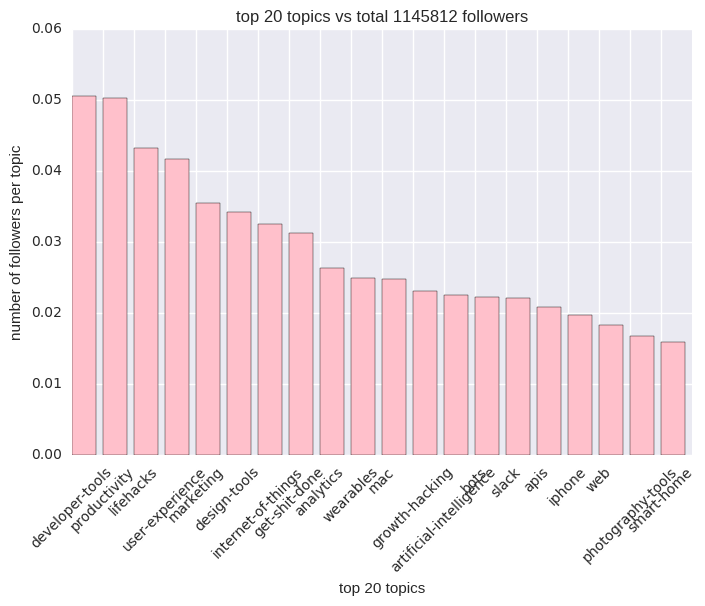

In [237]:
plt.bar(range(len(y)), y, color='pink')
plt.xticks(range(len(y)), x, rotation=45 );
plt.xlabel('top 20 topics')
plt.ylabel('number of followers per topic')
plt.title('top 20 topics vs total 1145812 followers')

In [239]:
topics.num_posts.sum()

194338

In [229]:
z = list(topics.sort('num_followers')[::-1][0:20].num_posts/(topics.num_posts.sum()*1.0))

/home/joanna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


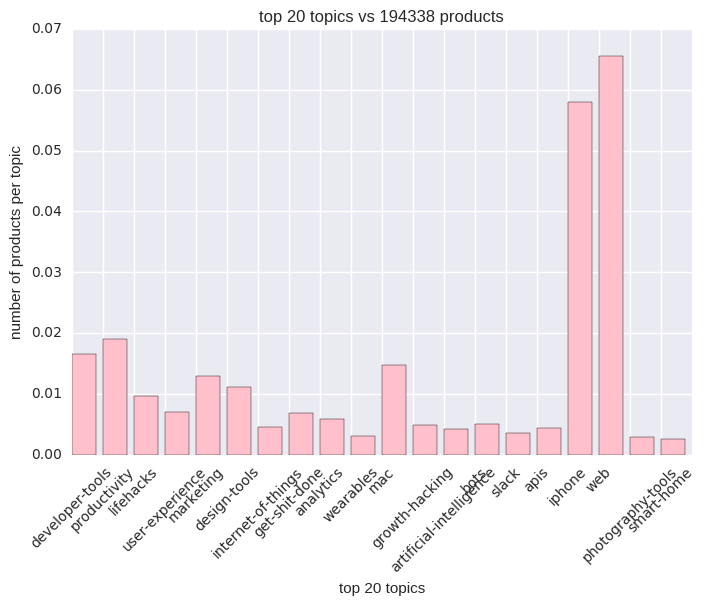

In [240]:
plt.bar(range(len(z)), z, color='pink')
plt.xticks(range(len(z)), x, rotation=45 );
plt.xlabel('top 20 topics')
plt.ylabel('number of products per topic')
plt.title('top 20 topics vs 194338 products')